In [50]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = 'data/city_data.csv'
ride_data = 'data/ride_data.csv'

# Read the City and Ride Data
citydatadf = pd.read_csv(city_data)
ridedatadf = pd.read_csv(ride_data)

# Combine the data into a single dataset
mergeddf = pd.merge(ridedatadf,citydatadf, how='outer', on='city',sort=False)
# Display the data table for preview
mergeddf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

Text(0.5,1,'Pyber Ride Sharing Data (2016)')

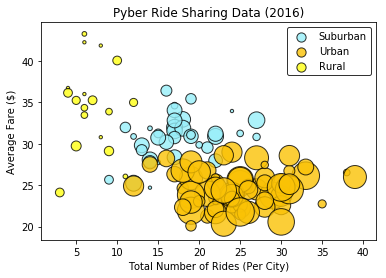

In [51]:
# Obtain the x and y coordinates for each of the three city types

# Set values to use in scatterplot
citygrouped = mergeddf.groupby("city")
citytype = citydatadf.set_index("city")["type"]

drivercount = citygrouped.mean()["driver_count"]
ridecount = citygrouped["ride_id"].count()

fareavg = citygrouped.mean()["fare"]

# Set variables into a new dataframe and the sorts by driver number descending
vardf = pd.DataFrame({"Number of Rides":ridecount,
                      "Average Fare": fareavg,
                      "Type of City":citytype,
                      "Number of Drivers":drivercount
                     })
vardf.sort_values("Number of Drivers", ascending = False)

#Sets up to create different scatter plots and then display in the same window
rural = vardf[vardf["Type of City"] == "Rural"]
urban = vardf[vardf["Type of City"] == "Urban"]
suburban = vardf[vardf["Type of City"] == "Suburban"]

#Creates the 3 scatterplots
colors = {"Orange":"#fac205", "Blue":"#98eff9", "Yellow":"#ffff14"}
colordicset = {"Rural": colors["Yellow"],"Suburban": colors["Blue"], "Urban": colors["Orange"]}

plt.scatter(suburban["Number of Rides"],suburban["Average Fare"],s=suburban["Number of Drivers"]*11,
            color=colordicset["Suburban"], edgecolor="black", label="Suburban", alpha=.8)
plt.scatter(urban["Number of Rides"],urban["Average Fare"],s=urban["Number of Drivers"]*11,
            color=colordicset["Urban"], edgecolor="black", label="Urban", alpha=.8)            
plt.scatter(rural["Number of Rides"],rural["Average Fare"],s=rural["Number of Drivers"]*11,
            color=colordicset["Rural"], edgecolor="black", label="Rural", alpha=.8)

legend = plt.legend(edgecolor = "black")
legend.legendHandles[0]._sizes = [85]
legend.legendHandles[1]._sizes = [85]
legend.legendHandles[2]._sizes = [85]

#Labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Save Figure
# savefig("BubblePlot.png")

## Total Fares by City Type

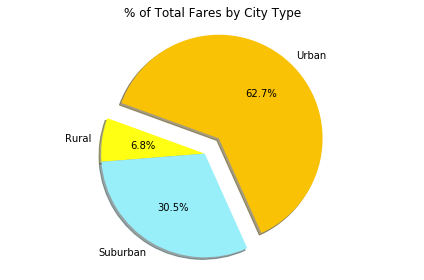

In [52]:
#Calculates the piechart values
piechartvalues = mergeddf.groupby("type")["type", "ride_id", "fare", "driver_count"]
fares= piechartvalues.sum()["fare"]
labels = fares.index

# Build Pie Chart
piecolorlist = [colordicset[n] for n in labels]
explode = [0,0,.2]
plt.pie(fares, startangle=160, colors=piecolorlist, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True,)
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.axis("equal")

plt.show()

## Total Rides by City Type

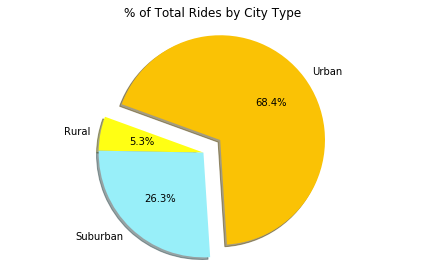

In [63]:
#Calculates the piechart values
rides= piechartvalues.count()["ride_id"]
labels = rides.index

# Build Pie Chart
piecolorlist = [colordicset[n] for n in labels]
explode = [0,0,.2]
plt.pie(rides, startangle=160, colors=piecolorlist, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True,)
plt.title("% of Total Rides by City Type")
plt.tight_layout()
plt.axis("equal")

plt.show()

## Total Drivers by City Type

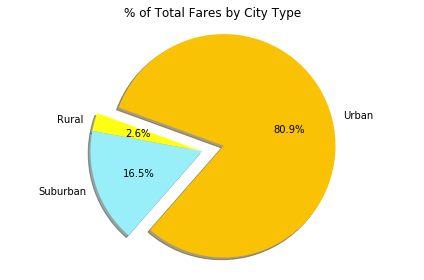

In [62]:
#Calculates the piechart values
drivers= citydatadf.groupby("type").sum()["driver_count"]
labels = drivers.index

# Build Pie Chart
piecolorlist = [colordicset[n] for n in labels]
explode = [0,0,.2]
plt.pie(drivers, startangle=160, colors=piecolorlist, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True,)
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.axis("equal")

plt.show()